This is a Logistic Regression model for the prediction of Survival in the Titanic Ship

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from utils import *

plt.style.use('deeplearning.mplstyle')

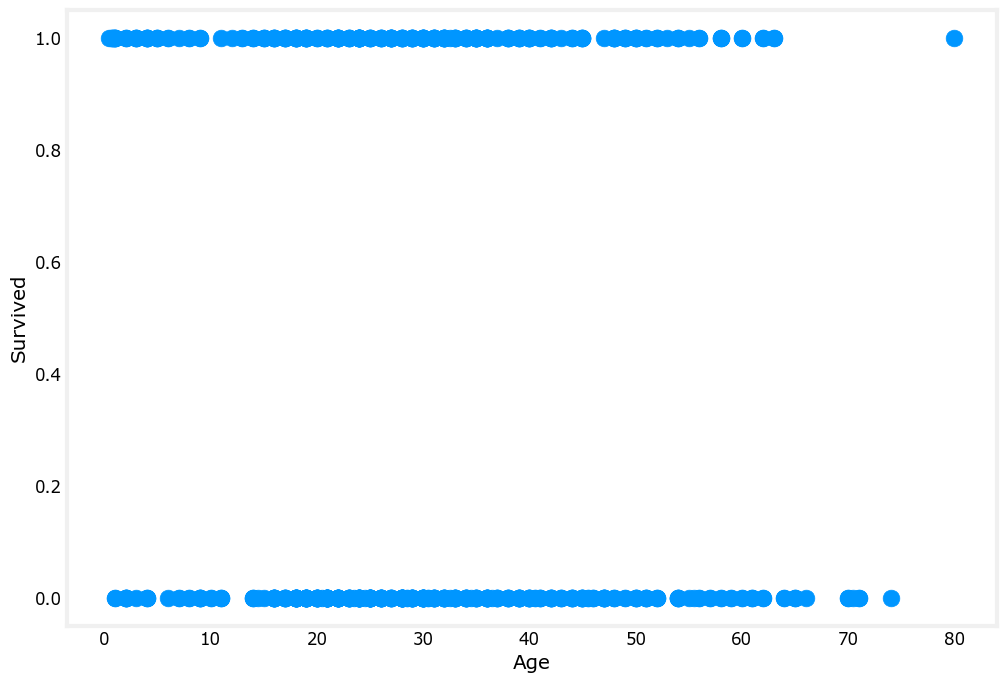

In [23]:
# Visualization of data
file_path = './data/train.csv'
pdv = pd.read_csv(file_path)
plt.scatter(pdv['Age'], pdv['Survived'])
plt.xlabel('Age')
plt.ylabel('Survived')
plt.show()

In [24]:
# Preprocessing data
df = modify_data(file_path)

data before processing...
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [25]:
# Splitting data into train and cross validation
X = df.drop(['Survived'], axis=1)
y = df['Survived']

X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'The X train and X cv are: {X_train.shape}, {X_cv.shape}')
print(f'The y train and y cv are: {y_train.shape}, {y_cv.shape}')


The X train and X cv are: (712, 28), (179, 28)
The y train and y cv are: (712,), (179,)


In [26]:
# Building a Logistic Regression Model
degree = 3
models = []
polys = []
scalers = []
f1_scores = np.zeros((degree, 2))
precisions = np.zeros((degree, 2))
recalls = np.zeros((degree, 2))
accuracy_scores = np.zeros((degree, 2))

threshold = 0.6
for i in range(1, degree + 1):
    print(f'Training Model with degree {i}')
    poly = PolynomialFeatures(degree=i, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_cv_poly = poly.transform(X_cv)
    polys.append(poly)
    
    scaler = StandardScaler()
    X_train_mapp = scaler.fit_transform(X_train_poly)
    X_cv_mapp = scaler.transform(X_cv_poly)
    scalers.append(scaler)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_mapp, y_train)
    models.append(model)
    
    yhat = model.predict_proba(X_train_mapp)[:, 1]
    yhat = np.where(yhat >= threshold, 1, 0)
    f1_scores[i-1, 0] = f1_score(y_train, yhat)
    precisions[i-1, 0] = precision_score(y_train, yhat)
    recalls[i-1, 0] = recall_score(y_train, yhat)
    accuracy_scores[i-1, 0] = accuracy_score(y_train, yhat)
    
    yhat_cv = model.predict_proba(X_cv_mapp)[:, 1]
    yhat_cv = np.where(yhat_cv >= threshold, 1, 0)
    f1_scores[i-1, 1] = f1_score(y_cv, yhat_cv)
    precisions[i-1, 1] = precision_score(y_cv, yhat_cv)
    recalls[i-1, 1] = recall_score(y_cv, yhat_cv)
    accuracy_scores[i-1, 1] = accuracy_score(y_cv, yhat_cv)
    
print('Results: ')
for i in range (degree): 
    print(f'For degree {i+1} the metrics are f1 score: {f1_scores[i]}, precision: {precisions[i]}, recall: {recalls[i]}, accuracy: {accuracy_scores[i]}')
print(yhat[:10])

Training Model with degree 1
Training Model with degree 2
Training Model with degree 3
Results: 
For degree 1 the metrics are f1 score: [0.73921971 0.76056338], precision: [0.82191781 0.79411765], recall: [0.67164179 0.72972973], accuracy: [0.82162921 0.81005587]
For degree 2 the metrics are f1 score: [0.80679406 0.74452555], precision: [0.93596059 0.80952381], recall: [0.70895522 0.68918919], accuracy: [0.87219101 0.80446927]
For degree 3 the metrics are f1 score: [0.83950617 0.74285714], precision: [0.93577982 0.78787879], recall: [0.76119403 0.7027027 ], accuracy: [0.89044944 0.79888268]
[0 0 0 0 0 0 0 0 0 1]


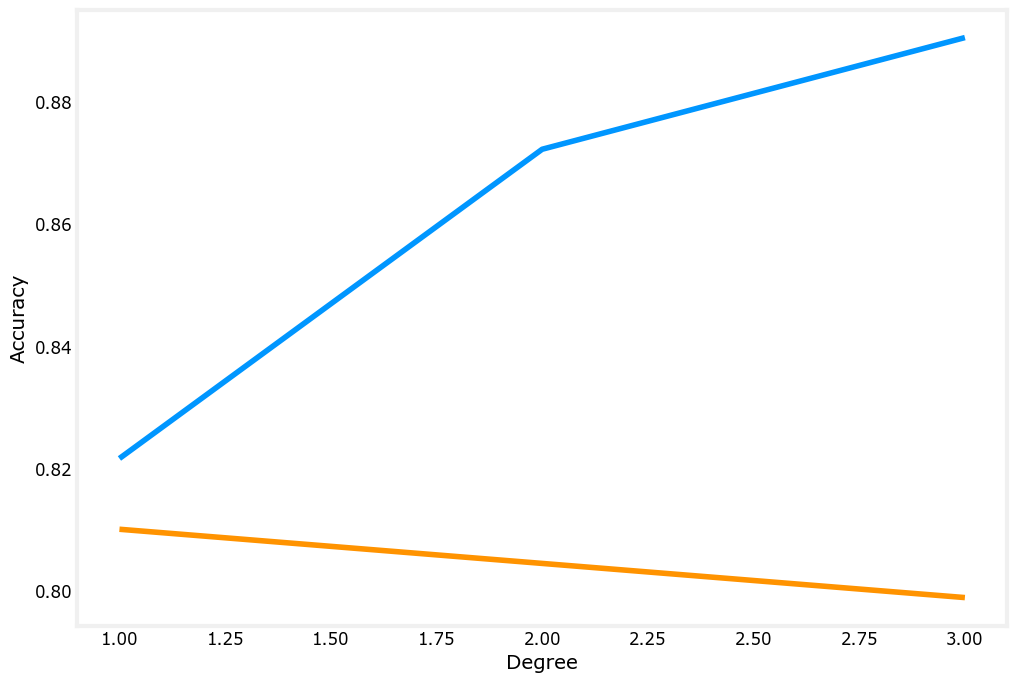

In [27]:
# Visualization of the results
plt.plot(range(1, degree + 1), accuracy_scores[:, 0], label='Accuracy Score')
plt.plot(range(1, degree + 1), accuracy_scores[:, 1], label='Accuracy Score')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.show()

In [28]:
# Scaling the training input
scaler_nn = StandardScaler()
X_train_nn = scaler_nn.fit_transform(X_train)
X_cv_nn = scaler_nn.transform(X_cv)

print(X_train_nn[:3])
print(X_cv_nn[:3])

[[ 1.22920747 -0.07868358 -0.30335547  0.59681695 -0.05307449 -0.39000456
  -0.32229795 -0.06504853 -0.06504853 -0.06504853 -0.03750293 -0.54705582
  -0.18270663 -0.13637447 -0.15161961 -0.08409599 -0.09964476 -0.51880845
  -1.1258401  -0.23744436  3.56262652 -0.16558088 -0.18677184 -0.13093073
  -0.06504853 -0.03750293 -1.8649363   0.7243102 ]
 [-0.50350514 -0.37714494 -0.30335547  0.59681695 -0.05307449 -0.39000456
  -0.32229795 -0.06504853 -0.06504853 -0.06504853 -0.03750293 -0.54705582
  -0.18270663 -0.13637447 -0.15161961 -0.08409599 -0.09964476  1.92749365
  -1.1258401  -0.23744436 -0.28069179 -0.16558088 -0.18677184 -0.13093073
  -0.06504853 -0.03750293  0.53621134  0.7243102 ]
 [ 0.18957991 -0.47486697 -0.30335547  0.59681695 -0.05307449 -0.39000456
  -0.32229795 -0.06504853 -0.06504853 -0.06504853 -0.03750293 -0.54705582
  -0.18270663 -0.13637447 -0.15161961 -0.08409599 -0.09964476 -0.51880845
   0.8882256  -0.23744436 -0.28069179 -0.16558088 -0.18677184 -0.13093073
  -0.06504

In [39]:
# Training the model
nn_model = build_model()

recalls_nn = np.zeros((3,2))
precisions_nn = np.zeros((3,2))
f1_scores_nn = np.zeros((3,2))
accuracy_scores_nn = np.zeros((3,2))

for i in range(len(nn_model)):
    lss=tf.keras.losses.BinaryCrossentropy(from_logits=True)
    optiizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    nn_model[i].compile(loss=lss, optimizer=optiizer)
    
    threshold = 0.6

    print(f'Training {nn_model[i].name}...')
    
    nn_model[i].fit(X_train_nn, y_train, epochs=200, verbose=0)

    print(f'Done Training {nn_model[i].name} \n ')
    yhat_nn = nn_model[i].predict(X_train_nn)
    yhat_nn = tf.math.sigmoid(yhat_nn)
    yhat_nn = np.where(yhat_nn >= threshold, 1, 0)
    f1_scores_nn[i, 0] = f1_score(y_train, yhat_nn)
    precisions_nn[i, 0] = precision_score(y_train, yhat_nn)
    recalls_nn[i, 0] = recall_score(y_train, yhat_nn)
    accuracy_scores_nn[i, 0] = accuracy_score(y_train, yhat_nn)
    
    yhat_cv_nn = nn_model[i].predict(X_cv_nn)
    yhat_cv_nn = tf.math.sigmoid(yhat_cv_nn)
    yhat_cv_nn = np.where(yhat_cv_nn >= threshold, 1, 0)
    f1_scores_nn[i, 1] = f1_score(y_cv, yhat_cv_nn)
    precisions_nn[i, 1] = precision_score(y_cv, yhat_cv_nn)
    recalls_nn[i, 1] = recall_score(y_cv, yhat_cv_nn)
    accuracy_scores_nn[i-1, 1] = accuracy_score(y_cv, yhat_cv_nn)
    
    
for i in range(len(nn_model)):
    print(f'For {nn_model[i].name} the metrics are f1 score: {f1_scores_nn[i]}, precision: {precisions_nn[i]}, recall: {recalls_nn[i]}, accuracy: {accuracy_scores_nn[i]}')
    

Training model1...
Done Training model1 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  
Training model2...
Done Training model2 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Training model3...
Done Training model3 
 
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
For model1 the metrics are f1 score: [0.8647541  0.70921986], precision: [0.95909091 0.74626866], recall: [0.78731343 0.67567568], accuracy: [0.90730337 0.79888268]
For model2 the metrics are f1 score: [0.81425891 0.76      ], precision: [0.81886792 0.75      ], recall: [0.80970149 0.77027027], accuracy: [0.86095506 0.58659218]
For model3 the metrics are f1 score: [0. 0.], precision: [0. 0.], recall: [0. 0.], accuracy: [0.62359551 0.77094972]


C:\Users\USER\AppData\Local\JetBrains\PyCharm2024.1\demo\PyCharmLearningProject\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\USER\AppData\Local\JetBrains\PyCharm2024.1\demo\PyCharmLearningProject\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
rf_model = build_rf
accuracy_scores_rf = np.zeros((3, 2))
for model in rf_model:
    print(f"Training {model.name}...")
    model.fit()
    print(f"Trained {model.name}")
    
    model.predict

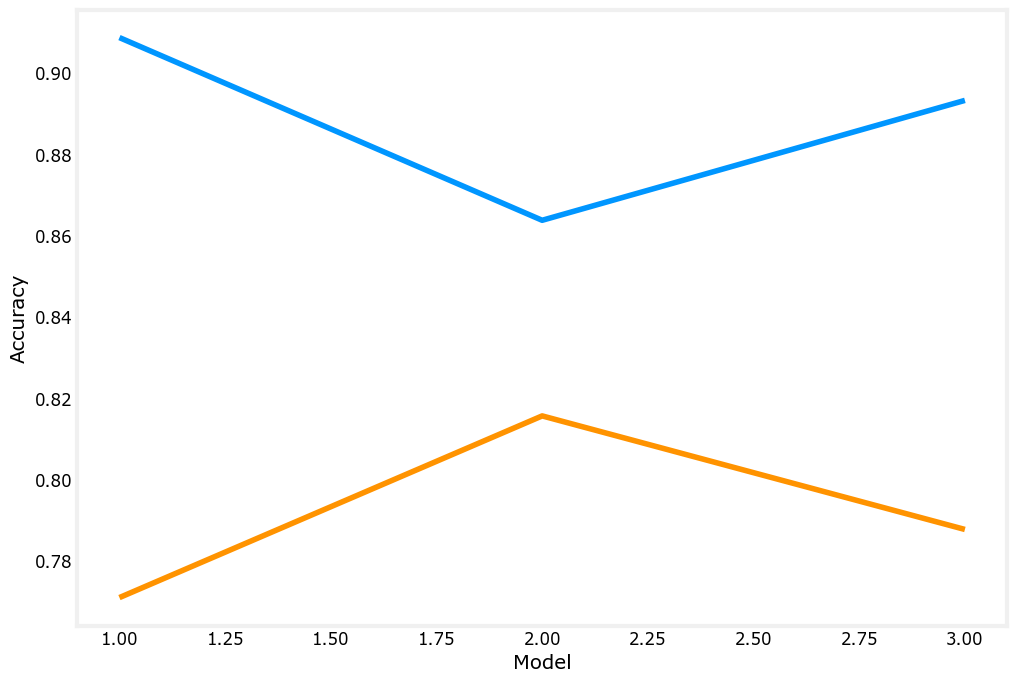

In [30]:
# Visualization of the results
plt.plot(range(1, 4), accuracy_scores_nn[:, 0], label='Accuracy Score')
plt.plot(range(1, 4), accuracy_scores_nn[:, 1], label='Accuracy Score')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

In [31]:
# Cleaning the test data
test_data = './data/test.csv'
test = modify_data(test_data, columns_reference=X.columns)
X_test = test

print(X_test[:3])

data before processing...
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
data after processing...
    Age     Fare  Embarked_Q  Embarked_S  Embarked_Unknown  Parch_1  Parch_2  \
0  34.5   7.8292        True       False      

In [32]:
# Selecting the best model for prediction
best_accuracy = np.argmax(accuracy_scores[:, 1])
best_accuracy_nn = np.argmax(accuracy_scores_nn[:, 1])

log_cv = accuracy_scores[best_accuracy, 1]
nn_cv = accuracy_scores_nn[best_accuracy_nn, 1]

print(f'Accuracy score for logistic regression model {log_cv}')
print(f'Accuracy score for neural network model {nn_cv}')

best_model = models[best_accuracy] if log_cv > nn_cv else nn_model[best_accuracy_nn]
print(f'The best model is {best_model.name}')

Accuracy score for logistic regression model 0.8100558659217877
Accuracy score for neural network model 0.8156424581005587
The best model is model2


In [17]:
# Selecting the best model for prediction
X_test = scaler_nn.transform(X_test)
yhat_test = best_model.predict(X_test)
yhat_test = tf.math.sigmoid(yhat_test)
yhat_test = np.where(yhat_test >= threshold, 1, 0)
print(yhat_test[:10])

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [18]:
# Saving the predictions
df_sub = pd.read_csv('./data/gender_submission.csv')
df_sub['Survived'] = yhat_test

df_sub.to_csv('./data/submission.csv', index=False)